# Predicting a continuous variable using regressor models
## Part2 - Find the relationship between X and Y

Like what we had done at the start of the course, the purpose of this notebook is to generate data that we can practice analyzing.

The notebook you should focus on is the 'seek' notebook - as the seek notebook illustrates how regressors can be used to fit the data and generate predictions.

Import the libraries we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

np.random.seed(1)

/Users/timsmith/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Load the data we generated in the 'hide' notebook.

In [2]:
df = pd.read_csv('week09-generated-data.csv')
df.head(10)

,input,target
0,16.24,7012.656224
1,-6.12,998.093472
2,-5.28,-2363.159552
3,-10.73,-4182.953117
4,8.65,-9417.042875
5,-23.02,-8650.137208
6,17.45,3866.981125
7,-7.61,374.501019
8,3.19,2554.197859
9,-2.49,-3941.738149


Seperate out the input m(X) and the target (y)

In [3]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

## Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

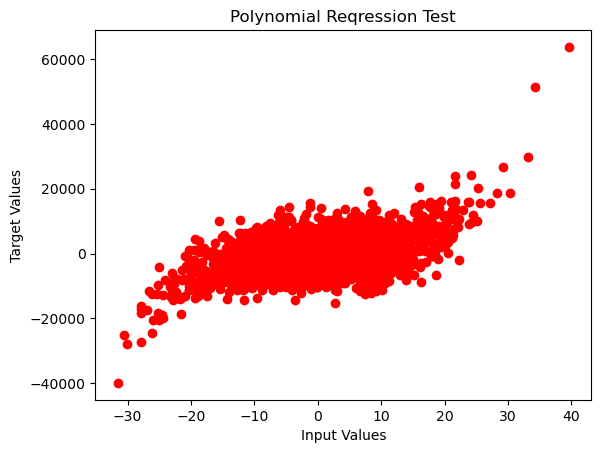

In [4]:
plt.scatter(X,y,color='red')
plt.title('Polynomial Reqression Test')
plt.xlabel('Input Values')
plt.ylabel('Target Values')
plt.show()

## Fit the data using a linear regression model

Fit the linear regression model to the dataset

In [5]:
lin_reg=LinearRegression() # Create and instance of sklearns Linear Regression model
_ = lin_reg.fit(X,y) # Fir the model to the data to identify the best beta's for each input variable (note: _ is a dummy variable)

y_pred=lin_reg.predict(X)

Visualize the linear regression model results

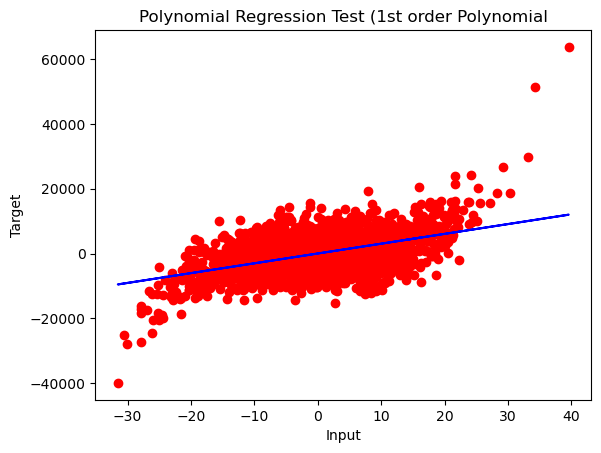

In [6]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Polynomial Regression Test (1st order Polynomial')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [7]:
mean_squared_error(y, y_pred)**(1/2)

5538.311480280734

## Let's try fitting a secon order polynomial

In this notebook we don't know what the true underlying relationship is -- with linear modeling we would need to make a good guess at the underlying relationship in order to have good fit. We could search for a very long time trying the guess at the underling function (look at the generating function again... would you have been able to identify this as the model and tried to fit it?)

Create the features (that is, x and x^2) for the linear regression. Then do all the analysis we did above again.

In [8]:
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
_ = poly_reg.fit(X_poly,y)

Fit this model to the polynomial features...

In [9]:
 lin_reg2=LinearRegression().fit(X_poly,y)
 y_pred=lin_reg2.predict(X_poly)

Explore the results visually...

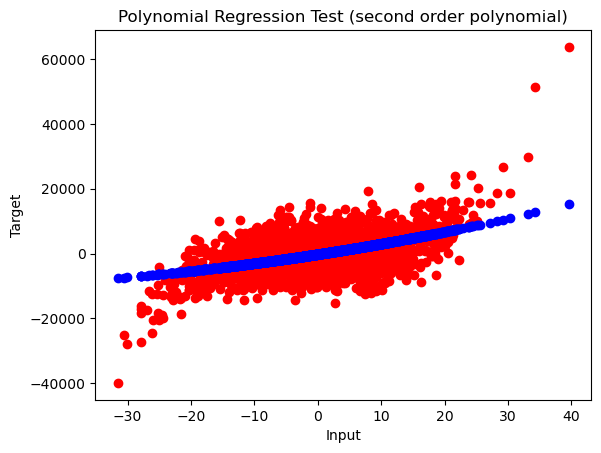

In [10]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.scatter(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Polynomial Regression Test (second order polynomial)')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [11]:
mean_squared_error(y, y_pred)**(1/2)

5529.564863000165

This is only slightly better than the first order model above. 

## KNN Regression


In [12]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X)


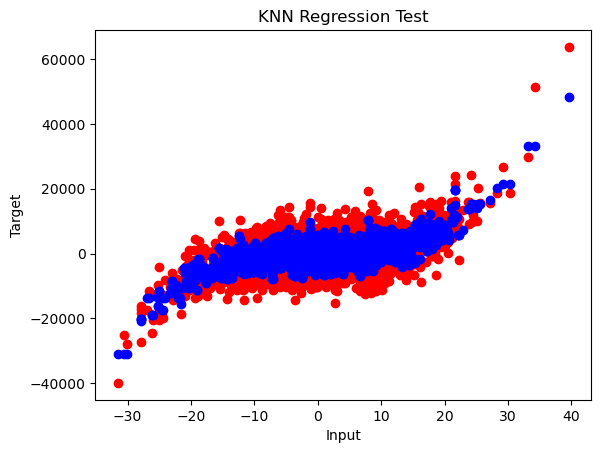

In [13]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.scatter(X,y_pred,color='blue')
plt.title('KNN Regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [14]:
mean_squared_error(y, y_pred)**(1/2)

4073.512346367897

This is a signifianct improvement over the linear models above, and does a better job at fitting the data.

## XGBoost regression

In [15]:
xgb = XGBRegressor(randome_state=1)
xgb.fit(X, y)
y_pred = xgb.predict(X)

[19:08:51] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "randome_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




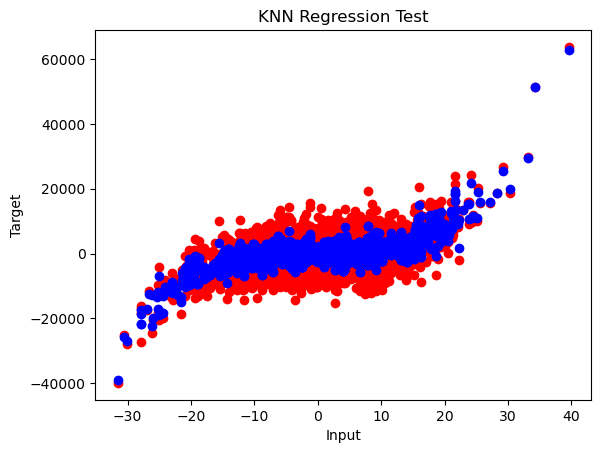

In [16]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.scatter(X,y_pred,color='blue')
plt.title('KNN Regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [17]:
mean_squared_error(y, y_pred)**(1/2)

3608.908543758408

This is even better than the knn model at fitting the data.

## Neural Networks for regression

In [18]:
ann = MLPRegressor(hidden_layer_sizes=(500,200,100,10), max_iter=1000)
ann.fit(X, y)
y_pred = ann.predict(X)

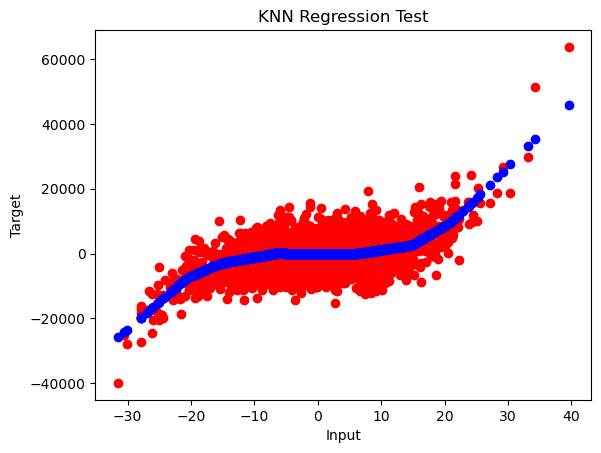

In [19]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.scatter(X,y_pred,color='blue')
plt.title('KNN Regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [20]:
mean_squared_error(y, y_pred)**(1/2)

4975.414810437907

## Discussion of Results

The KNN and XGBoost fit data the best -- but, keep in mind that we haven't done a train/test split. When looking at the graph of each model, KNN and XGBoost are indicating that they may be 'overfitting' the data. The linear models seem to be missing the underlying relationship. The MLPRegression has done an excellent job at identifing the underlying relationship.

![](hidden_function.png)